# Supervised Machine Learning Final Project

### Import the required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import normalize
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix

## I. Project Information
This is a project where I will use supervised machine learning to perform binary classification. In this specific case, I chose weather data collected for 10 years from Australia. The goal is to predict whether it will rain tomorrow, based on the weather data from today.

Weather forecasting is a complicated topic, and I was interested in how accurate we can make predictions about tomorrow's weather, solely based on the weather today, without using information about the weather that is happening elsewhere. 

Github repository: <br>
https://github.com/highdeltav/SupervisedLearning/blob/main/machine_learning_supervised_final_project.ipynb <br>
https://github.com/highdeltav/SupervisedLearning/blob/main/machine_learning_supervised_final_project.pdf


## II. Data Information
This dataset was obtained from Kaggle. I only downloaded the raw dataset, and because of the nature of this assignment, I did not read any of the other code relating to the dataset. <br> 

The dataset itself is 10 years worth of weather data from different cities in Australia. The data was gathered from publicly available weather data, produced by the Australian Bureau of Meteorology. The weather observations were taken twice a day at 9 AM and 3PM. There are also some values that were aggregated over the entire 24 hour day.<br>

The data is tabulated data featuring 14,5460 samples and 23 features. However, because weather data would vary from region to region and station to station, I limited the data that I was using to just the city of Sydney, which has 3,344 observations. 


There are features relating to temperature, pressure, cloudiness and rainfall. Most of the features are numerical, however, wind direction is categorical, with 16 different categories, and 'RainToday' and "RainTomorrow' are both binary categories, with a yes/no value.

This is also an unbalanced dataset. Approximately 25 percent of the days have rain, and 75 percent do not.

**Citation** <br>
Young, Joe.  *Rain in Australia* \[Data set\]. https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?resource=download

In [2]:
# Read in CSV
df_all =pd.read_csv('rain_aus/weatherAUS.csv')


In [3]:
df_all.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
print(f"Total number of Observations: {len(df_all.index)}" )
print(f"Total number of wind directions: {len(df_all['WindDir9am'].value_counts())}")

Total number of Observations: 145460
Total number of wind directions: 16


In [5]:
# List features and their types
df_all.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
# Number of observations from each city
df_all['Location'].value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


In [7]:
# Take only the rows from Sydney
df = df_all.loc[df_all['Location']=='Sydney']
#df_syd[['month']] = df_syd.Date.dt.month
print(f"Total Number of observations from Sydney: {len(df.index)}")
df.head()

Total Number of observations from Sydney: 3344


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [8]:
print(df['Date'].max(), df['Date'].min())

2017-06-25 2008-02-01


In [9]:
percentage_of_rainy_days = np.count_nonzero(df['RainTomorrow'])/len(df)
print(f"Percentage of Rainy Days: {percentage_of_rainy_days:.3}")

Percentage of Rainy Days: 1.0


## III. Data Cleaning

After looking at the dtypes of the dataframe, I first noticed that the date was an object, so I converted that to a datetime object. I didn't feel that a specific date would do much good in model, but weather patterns have extreme variations based on time of year, so I extracted just the month, and created a new column for it. 

In [10]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [11]:
# Convert date column to a datetime object
pd.to_datetime(df['Date'])
df = df.astype({'Date':'datetime64'})
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [12]:
# Add a month column
df['month'] = df.Date.dt.month


The next step I accomplished was for the 'RainToday' and 'RainTomorrow' features, I converted the yes values to 1 and the no values to 0.

In [13]:
# Convert the boolean, yes/no columns into 1s and 0s
df.loc[df['RainToday']=='Yes', 'RainToday'] = 1
df.loc[df['RainToday']=='No', 'RainToday'] = 0
df.loc[df['RainTomorrow']=='Yes', 'RainTomorrow'] = 1
df.loc[df['RainTomorrow']=='No', 'RainTomorrow'] = 0

# Make the columns numeric
df[['RainToday', 'RainTomorrow']] = df[['RainToday', 'RainTomorrow']].apply(pd.to_numeric)

once that was done, the next part I undertook in the data cleaning process was to look at null values of the data. The first thing I noticed is that there were null values in the "RainTomorrow" feature. Since that is what we are going to create our predictive models from, I just deleted the rows with null values in that feature.

For all of the other features, except 'Clouds9am', 'Clouds3pm', 'WindGustDir' and 'WindGustSpeed', I decided to take the median value of that feature for that month, since weather patterns do change from month to month, I felt that taking the median from the month would give me a more accurate replacement value.

The wind gust and wind speeds, were a different challenge. There made up a substantial amount of rows, so I was trying to decide whether I should just delete both columns. However, I looked at the minimum value of "gust speed" and it was 17. This caused me to do some more research about how wind gusts are classified. I couldn't find a specific answer for the Australian Bureau of Meteorology, but I did find a definition from the [National Weather Service](https://graphical.weather.gov/definitions/defineWindGust.html), in the United States. that listed 16 knots as the minimum for a gust, pl. 17 Km/h is about 10 knots. Because of this information, I decided to treat the null gust values, as a zero, instead of dropping the feature all together. I did this because it would appear in this data, the days where there aren't gusts, are not recorded at all, and appear as a null value. 

Lastly, I had to deal with the values of cloud cover. These data points felt important to me since we are trying to predict rain, and clouds are and important part of rain. That is a measurement that is taken in eights of the sky covered. Since the dataset shows a min of zero and a max of 8, I decided not to treat this like the wind gusts, because it did appear that they did record both clear days, and overcast days. Because of the importance I placed on this feature, I decided to just delete all of the rows that contained null values for clouds. 

Once this was done, the only null values remaining were for 'WindGustDir', and I left them, so they would become their own category, when I changed the categorical values to numerical values. 

In [14]:
df.isnull().sum()

Date                0
Location            0
MinTemp             4
MaxTemp             2
Rainfall            7
Evaporation        51
Sunshine           16
WindGustDir      1038
WindGustSpeed    1038
WindDir9am         56
WindDir3pm         33
WindSpeed9am       26
WindSpeed3pm       25
Humidity9am        15
Humidity3pm        13
Pressure9am        21
Pressure3pm        19
Cloud9am          568
Cloud3pm          563
Temp9am             5
Temp3pm             4
RainToday           7
RainTomorrow        7
month               0
dtype: int64

In [15]:
# Drop rows with NA Values

#Drop RainTomorrow, since it is supposed to be truth
df.dropna(subset = 'RainTomorrow', inplace = True)

df.dropna(subset = 'WindDir9am', inplace = True)
df.dropna(subset = 'WindDir3pm', inplace = True)
df.dropna(subset = 'Cloud9am', inplace = True)
df.dropna(subset = 'Cloud3pm', inplace = True)

# The minnimum for gusts is 17. The NWS in the US only records gusts above 16 knots.
# Because of that, I am assuming null values, had no wind gusts above that threshold, so I am replacing them with 0.
df['WindGustSpeed'].fillna(0, inplace = True)

# Select coulumns to take the median of for NA values. I took the median of the values, grouped by month, since the
# median and means would change drastically through the year
colunms_to_median = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine','Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm','Temp9am', 'Temp3pm', 'RainToday']
for col in colunms_to_median:
    df[col].fillna(df.groupby(['month'])[col].transform('median'), inplace = True)

print(f"Observations remaining: {len(df)}")
df.isnull().sum()


Observations remaining: 2705


Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      959
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow       0
month              0
dtype: int64

I then converted the categorical variables to numbers, so that each different category would be have a different number. This included the null values for WindGustDir.

In [16]:
# Chaingning the catagorical features to numbers. 
df['WindDir9am'] = df['WindDir9am'].astype('category').cat.codes
df['WindDir3pm'] = df['WindDir3pm'].astype('category').cat.codes

# Chaning WindGustDir to catagories also makes the null values equal to zero, which is expected
df['WindGustDir'] = df['WindGustDir'].astype('category').cat.codes

In [17]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir                int8
WindGustSpeed           float64
WindDir9am                 int8
WindDir3pm                 int8
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday               float64
RainTomorrow            float64
month                     int64
dtype: object

The last step that I took was to remove the date and location features. As previously discussed, since I was only using data from Sydney, that field was now superfluous. As for the date, I had already extracted the value that I needed from it, so the date in its present format would not help in the modeling process.

In [18]:
# Drops 'Date' and 'Location' because they will not help the machine learning modeling
df.drop(['Date', 'Location'], axis = 1, inplace = True)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month
30176,19.5,22.4,15.6,6.2,0.0,-1,0.0,8,11,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0,1.0,2
30177,19.5,25.6,6.0,3.4,2.7,-1,0.0,13,0,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0,1.0,2
30178,21.6,24.5,6.6,2.4,0.1,-1,0.0,2,2,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0,1.0,2
30179,20.2,22.8,18.8,2.2,0.0,-1,0.0,5,0,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0,1.0,2
30180,19.7,25.7,77.4,6.8,0.0,-1,0.0,5,13,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0,1.0,2


## IV. Exploratory Data Analysis

The first thing that I did was look at the summary values of the different rows. I looked for any values that didn't seem to make sense, especially for the max and min values. I was looking for outliers that might need to be 
addressed in the data. The data seemed reasonable from this perspective. There were certainly some really hot days, or really windy days, but nothing that didn't seem possible. 

Looking at the box plots, rainfall showed significant outliers, but that makes sense in a region where most days it does not rain at all.

Also, looking at the histograms, there didn't seem to be any strange outliers, or distributions that didn't make sense for the data. 

In [19]:
with pd.option_context('display.max_columns', 40):
    print(df.describe(include='all'))

           MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  2705.000000  2705.000000  2705.000000  2705.000000  2705.000000   
mean     14.772052    23.018743     3.205989     5.213974     7.294584   
std       4.546462     4.515104     9.544302     2.788708     3.760587   
min       4.300000    11.700000     0.000000     0.000000     0.000000   
25%      11.000000    19.600000     0.000000     3.200000     4.500000   
50%      14.800000    22.800000     0.000000     4.800000     8.400000   
75%      18.700000    26.000000     1.200000     7.000000    10.200000   
max      27.100000    45.800000   119.400000    18.400000    13.600000   

       WindGustDir  WindGustSpeed   WindDir9am   WindDir3pm  WindSpeed9am  \
count  2705.000000    2705.000000  2705.000000  2705.000000   2705.000000   
mean      4.876155      27.027357    10.223290     5.925693     15.112015   
std       5.788733      22.570370     4.404775     4.998153      6.914125   
min      -1.000000       

<AxesSubplot:>

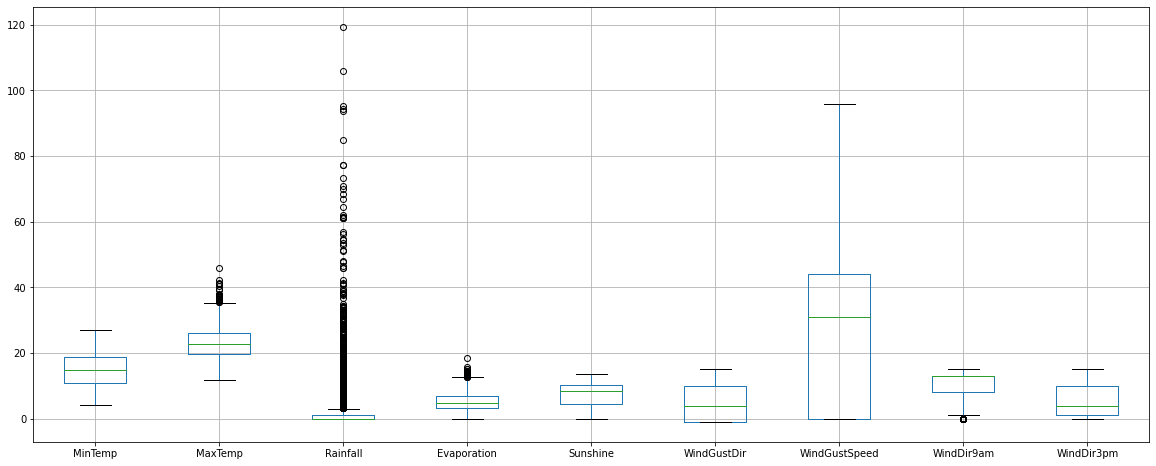

In [20]:
plt.rcParams["figure.figsize"] = (20,8)
box_plot_columns = df.columns.tolist()
box_plot_columns.remove('Pressure9am')
box_plot_columns.remove('Pressure3pm')
df.boxplot(column= box_plot_columns[0:9])

<AxesSubplot:>

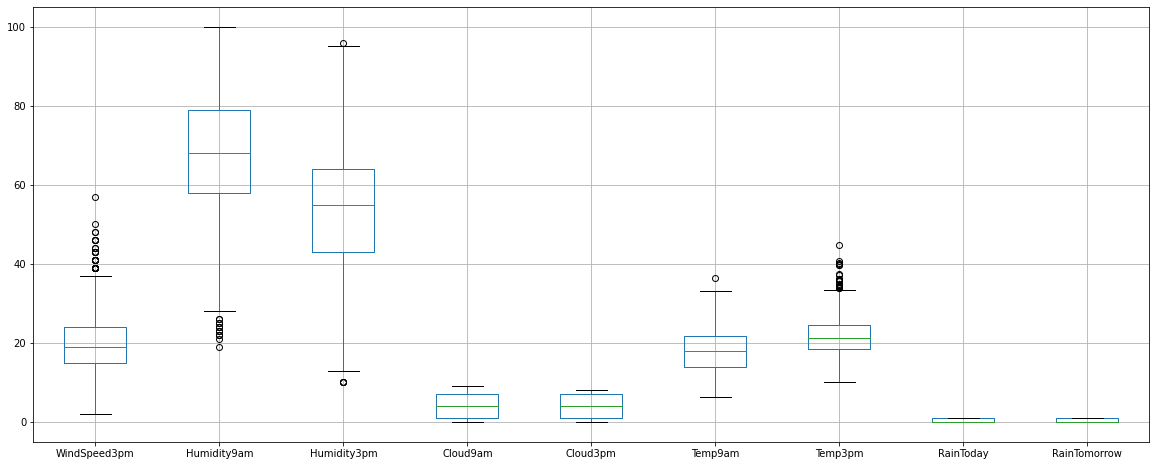

In [21]:
df.boxplot(column= box_plot_columns[10:19])

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>,
        <AxesSubplot:title={'center':'Sunshine'}>],
       [<AxesSubplot:title={'center':'WindGustDir'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindDir9am'}>,
        <AxesSubplot:title={'center':'WindDir3pm'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>],
       [<AxesSubplot:title={'center':'WindSpeed3pm'}>,
        <AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}

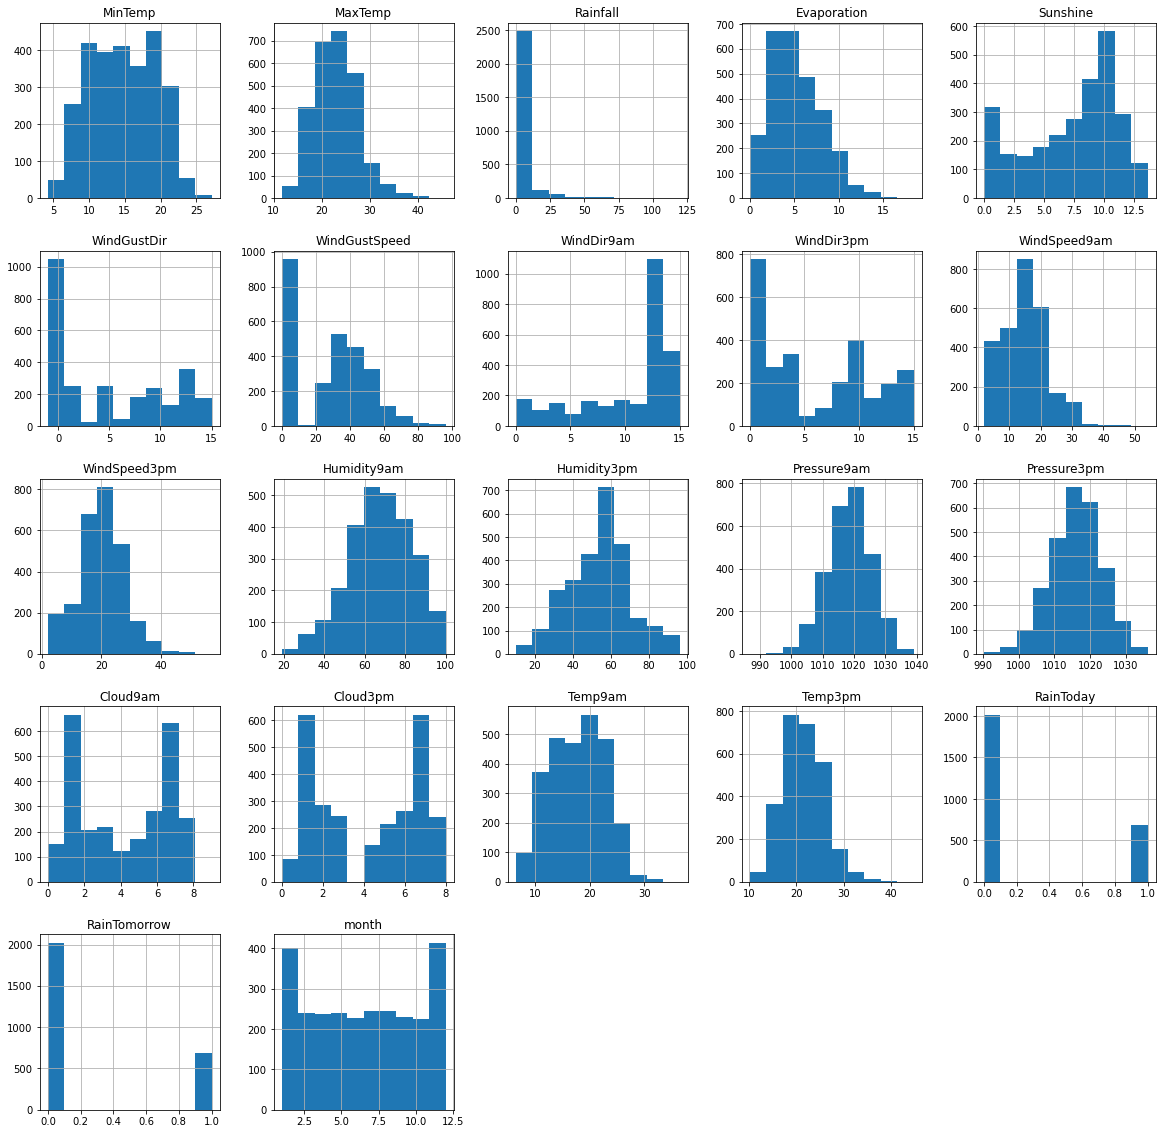

In [22]:
plt.rcParams["figure.figsize"] = (20,20)
df.hist()

I also created a heatmap to look at the correlation of the different features. There was high correlation between some of the columns. The temperatures taken at 9 AM and 3 PM, where highly correlated with the temperatures max and the min temperatures for the day. I decided to remove the individual temperature readings, and just keep the minimum and the maximum readings. 

The two pressure readings were also highly correlated with themselves. Since we are trying to predict rain tomorrow, and pressure is an indicator of the type of weather that is happening, I just kept the afternoon reading, which is closer to the time we are trying to predict. 

Text(0.5, 1.0, 'Correlation of Features')

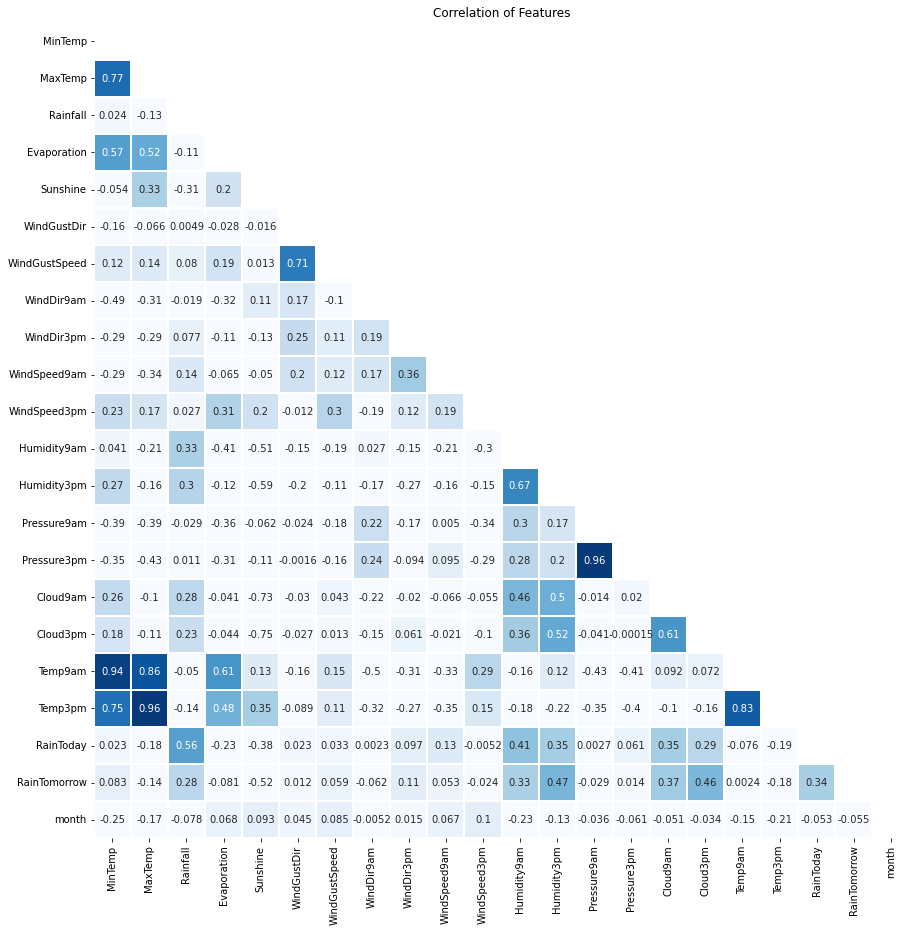

In [23]:
corr = df.corr()
mask = mask = np.triu(corr)
plt.rcParams["figure.figsize"] = (15,15)
ax1 = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues', annot=True, mask=mask)
plt.title('Correlation of Features')

Before dropping 'Pressure9am', I did also did some minor feature engineering by adding a column 'PressureChange'. This takes the difference in pressure from the morning pressure observation, and the afternoon pressure reading. I added this feature since pressure change can signal changes in weather. 

In [24]:
# Add Pressure Change
df['PressueChange'] = df['Pressure3pm']-df['Pressure9am']

In [25]:
# Drop the highly correlated features
df_dropped = df.drop(['Pressure9am','Temp9am','Temp3pm'], axis = 1)

In [26]:
df_dropped.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,month,PressueChange
count,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000
mean,14.772052,23.018743,3.205989,5.213974,7.294584,4.876155,27.027357,10.223290,5.925693,15.112015,19.322366,67.612939,53.984473,1016.069979,4.159704,4.205545,0.255453,0.252865,6.498706,-2.383330
std,4.546462,4.515104,9.544302,2.788708,3.760587,5.788733,22.570370,4.404775,4.998153,6.914125,7.409985,15.271722,16.282516,7.019000,2.751076,2.642655,0.436196,0.434735,3.354667,1.965685
min,4.300000,11.700000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,19.000000,10.000000,990.300000,0.000000,0.000000,0.000000,0.000000,1.000000,-17.400000
25%,11.000000,19.600000,0.000000,3.200000,4.500000,-1.000000,0.000000,8.000000,1.000000,11.000000,15.000000,58.000000,43.000000,1011.300000,1.000000,1.000000,0.000000,0.000000,4.000000,-3.600000
50%,14.800000,22.800000,0.000000,4.800000,8.400000,4.000000,31.000000,13.000000,4.000000,15.000000,19.000000,68.000000,55.000000,1016.400000,4.000000,4.000000,0.000000,0.000000,7.000000,-2.500000
75%,18.700000,26.000000,1.200000,7.000000,10.200000,10.000000,44.000000,13.000000,10.000000,20.000000,24.000000,79.000000,64.000000,1020.900000,7.000000,7.000000,1.000000,1.000000,9.000000,-1.200000
max,27.100000,45.800000,119.400000,18.400000,13.600000,15.000000,96.000000,15.000000,15.000000,54.000000,57.000000,100.000000,96.000000,1036.000000,9.000000,8.000000,1.000000,1.000000,12.000000,6.500000


## V. Modeling

My first step in the modeling process was the split the target variable into its own dataframe, and split the data into training and test sets. 

In [27]:

# Create the X and y sets.
y = df_dropped['RainTomorrow']
X = df_dropped.drop('RainTomorrow', axis = 1)

In [28]:
# Split the data into training and test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

Some of the models I was going to work better with normalized data. With the same train/test split, I also normalized the data.

In [29]:
X_norm_train = normalize(X_train)
X_norm_test = normalize(X_test)
X_norm = normalize(X)

I also created empty lists, so I could graph some comparison of models.


In [30]:
all_scores = []
all_recall = []
all_precision = []
all_tpr = []
all_fpr = []
all_auc = []
all_models = []

### KNN Neighbor Model

The first model that I chose to work with was the KNN nearest neighbors mode. I initially tried just the default values, and got a reasonable value, so I then moved on to trying to tune the hyperparameter of number of neighbors. This resulted in a best neighbor score of 25.

In [31]:
KN_class = KNeighborsClassifier()
KN_model = KN_class.fit(X_norm_train, y_train)

In [32]:
KN_model.score(X_norm_test, y_test)

0.8040313549832027

In [33]:
test_neighbors = range(1,50)
grid_kn=GridSearchCV(estimator = KNeighborsClassifier(),
                  cv = 5,
                  param_grid={
                      'n_neighbors': test_neighbors}
                     ,verbose = 1)
grid_kn.fit(X_norm,y)
                    
                      

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)}, verbose=1)

In [34]:
print(grid_kn.best_params_)
print(grid_kn.best_score_)


{'n_neighbors': 27}
0.8310536044362292


In [35]:
#Create an estimator off of the best estimator from the grid search
KN_best = grid_kn.best_estimator_
fpr, tpr, threshold = metrics.roc_curve(y_test, KN_best.predict_proba(X_test.values)[:,1])
all_fpr.append(fpr)
all_tpr.append(tpr)

# Generate statistics about the models
pred = KN_best.predict(X_test.values)
accuracy = metrics.accuracy_score(y_test, pred)
recall = metrics.recall_score(y_test, pred)
precision = metrics.precision_score(y_test, pred)
auc = metrics.auc(fpr, tpr)

#Append scores for final analysis comparison
all_scores.append(accuracy)
all_recall.append(recall)
all_precision.append(precision)
all_auc.append(auc)
all_models.append('KNN')

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Accuracy: 0.8253079507278835
Recall: 0.4425531914893617
Precision: 0.8062015503875969


### Decision Tree Model

I then moved on to try a decision tree model. I first tested it with the default parameters, and then tried to tune max_depth and ccp_alpha. Interestingly, in a basic decision tree model, the most accurate model, that I found, only had a max_depth of 1, with the most important feature being the afternoon humidity. If a model was only going to use one value, this is a logical one for it to use, since rain is moisture in the air, and humidity is a measure of moisture.

In [36]:
tree_class = DecisionTreeClassifier()
tree_mod = tree_class.fit(X_train, y_train)

In [37]:
tree_mod.score(X_test, y_test)

0.7681970884658454

In [38]:
print(tree_mod.get_depth())

19


In [39]:
grid_tree=GridSearchCV(estimator = DecisionTreeClassifier(),
                  cv = 5,
                  param_grid={
                      'max_depth': [1,2,3,4,5,7,8,9,10,15,20,50],
                      'ccp_alpha': [0,.01,.02,.03,.04,.05,.06]},
                  verbose =1)
grid_tree.fit(X_train,y_train)


Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06],
                         'max_depth': [1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 50]},
             verbose=1)

In [40]:
print(grid_tree.best_params_)
print(grid_tree.best_score_)

{'ccp_alpha': 0, 'max_depth': 1}
0.8316926167754897


In [41]:
#Create an estimator off of the best estimator from the grid search
grid_tree_best = grid_tree.best_estimator_
fpr, tpr, threshold = metrics.roc_curve(y_test, grid_tree_best.predict_proba(X_test)[:,1])
all_fpr.append(fpr)
all_tpr.append(tpr)

# Generate statistics about the models
pred = grid_tree_best.predict(X_test)
accuracy = metrics.accuracy_score(y_test, pred)
recall = metrics.recall_score(y_test, pred)
precision = metrics.precision_score(y_test, pred)
auc = metrics.auc(fpr, tpr)

#Append scores for final analysis comparison
all_scores.append(accuracy)
all_recall.append(recall)
all_precision.append(precision)
all_auc.append(auc)
all_models.append('Decision Tree')

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Accuracy: 0.812989921612542
Recall: 0.3702127659574468
Precision: 0.8207547169811321


<AxesSubplot:title={'center':'Feature Importance'}>

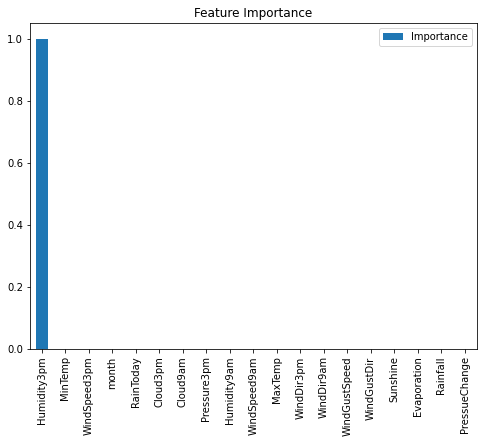

In [42]:
# Plot of feature importance

feat_importances = pd.DataFrame(grid_tree_best.feature_importances_, index=X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6), title = 'Feature Importance')

### AdaBoost Model

I also tried an AdaBoost Model. After an initial test with the default parameters, I also tuned the parameters n-estimators and learning_rate. I initially ran the grid search, and then when I got the answer, I then added some parameters around the best model, so see if I could further fine tune the model. It also showed that afternoon humidity was the most important, but also took into account other variables as well. The pressure change feature that I added, had importance in the model, but it was the least important of the important features that the model used.

In [43]:
ada_class = AdaBoostClassifier(learning_rate = .5)
ada_model = ada_class.fit(X_train, y_train)
ada_model.score(X_test, y_test)

0.8085106382978723

In [44]:
learning_rate = np.logspace(-5,1,11, base = 2)
grid_ada=GridSearchCV(estimator = AdaBoostClassifier(),
                  cv = 5,
                  param_grid={
                      'n_estimators': [1,30,35,40,45,50,55,58,59,60,61,65],
                      'learning_rate': learning_rate},
                      verbose = 1)
grid_ada.fit(X_train,y_train)

Fitting 5 folds for each of 132 candidates, totalling 660 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': array([0.03125   , 0.04736614, 0.07179365, 0.10881882, 0.16493849,
       0.25      , 0.37892914, 0.57434918, 0.87055056, 1.31950791,
       2.        ]),
                         'n_estimators': [1, 30, 35, 40, 45, 50, 55, 58, 59, 60,
                                          61, 65]},
             verbose=1)

In [45]:
print(grid_ada.best_params_)
print(grid_ada.best_score_)

{'learning_rate': 0.16493848884661177, 'n_estimators': 40}
0.8493447787772249


In [46]:
#Create an estimator off of the best estimator from the grid search
ada_best = grid_ada.best_estimator_
fpr, tpr, threshold = metrics.roc_curve(y_test, ada_best.predict_proba(X_test)[:,1])
all_fpr.append(fpr)
all_tpr.append(tpr)

# Generate statistics about the models
pred = ada_best.predict(X_test)
accuracy = metrics.accuracy_score(y_test, pred)
recall = metrics.precision_score(y_test, pred)
precision = metrics.precision_score(y_test, pred)
auc = metrics.auc(fpr, tpr)

#Append scores for final analysis comparison
all_scores.append(accuracy)
all_recall.append(recall)
all_precision.append(precision)
all_auc.append(auc)
all_models.append('AdaBoost')

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Accuracy: 0.8174692049272116
Recall: 0.7571428571428571
Precision: 0.7571428571428571


<AxesSubplot:title={'center':'Feature Importance'}>

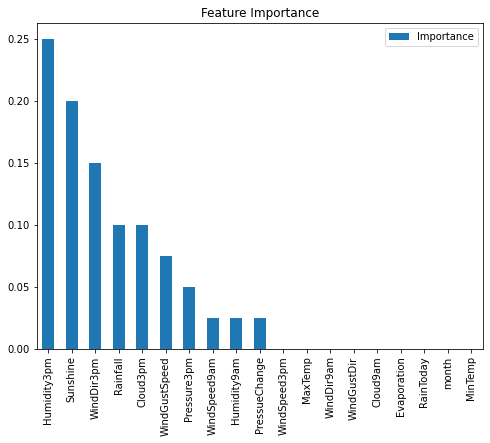

In [47]:
# Plot of feature importance

feat_importances = pd.DataFrame(ada_best.feature_importances_, index=X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6), title = 'Feature Importance')

### Random Forest

I also used the same procedure for random forest and tuned the hyperparameters n_estimators and max_features. The random forest did use all of the features, but the afternoon humidity was still the most important feature, but sunshine, was close behind on how important it is in the model.

In [48]:
rf_class = RandomForestClassifier()
rf_model = rf_class.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.8230683090705487

In [49]:
grid_rf=GridSearchCV(estimator = RandomForestClassifier(),
                  cv = 5,
                  param_grid={
                      'n_estimators': [25,50,100,140,150,160,200],
                      'max_features' : ['sqrt','log2']},
                      verbose = 1)
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [25, 50, 100, 140, 150, 160, 200]},
             verbose=1)

In [50]:
print(grid_rf.best_params_)
print(grid_rf.best_score_)

{'max_features': 'sqrt', 'n_estimators': 140}
0.8465884358400683


In [51]:
#Create an estimator off of the best estimator from the grid search
rf_best = grid_rf.best_estimator_
fpr, tpr, threshold = metrics.roc_curve(y_test, rf_best.predict_proba(X_test)[:,1])
all_fpr.append(fpr)
all_tpr.append(tpr)

# Generate statistics about the models
pred = rf_best.predict(X_test)
accuracy = metrics.accuracy_score(y_test, pred)
recall = metrics.recall_score(y_test, pred)
precision = metrics.precision_score(y_test, pred)
auc = metrics.auc(fpr, tpr)

#Append scores for final analysis comparison
all_scores.append(accuracy)
all_recall.append(recall)
all_precision.append(precision)
all_auc.append(auc)
all_models.append('Random Forest')

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Accuracy: 0.8219484882418813
Recall: 0.46382978723404256
Precision: 0.7676056338028169


<AxesSubplot:title={'center':'Feature Importance'}>

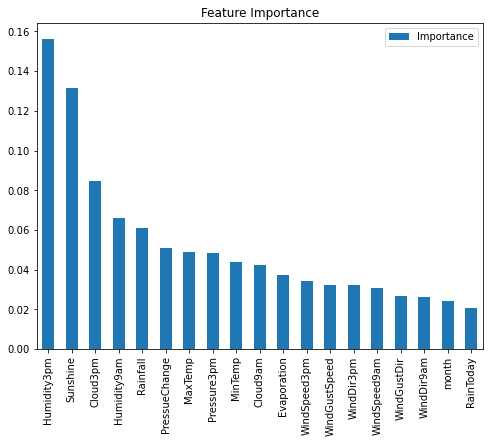

In [52]:
# Plot of feature importance

feat_importances = pd.DataFrame(rf_best.feature_importances_, index=X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6), title = 'Feature Importance')

## VI. Results and Analysis

Since this is an unbalanced dataset, it is important to remember that there was only rain the next day on 25 percent of days. This means that you could guess that there no rainy days and you would have an accuracy of 75 percent. Therefore, accuracy should not be the most important metric to look at. All of the models have very similar accuracy, but that is misleading in this case. 

Other metrics that can be looked at include, AUC, precision and recall. If we look at AUC, KNN was the hight rated metric, with decision tree coming in a distant last place. 

However, if we then look at precision, the basic decision tree appears to be the winner, with KNN almost as good, while AdaBoost and Random Forest, have slightly lower precision scores.

Recall, though, is where things get interesting. Most of the models are absolutely abysmal when it comes to recall. Three of the models had a recall of less than .5. Which means, even though the model tended to be right about its positive predictions, they also predicted that a lot of days would have no rain, when in fact it did rain. The interesting outlier in this case is the AdaBoost model. It had a recall of .75, which is significantly higher than all of the other models. This was made with a slight decrease in precision.

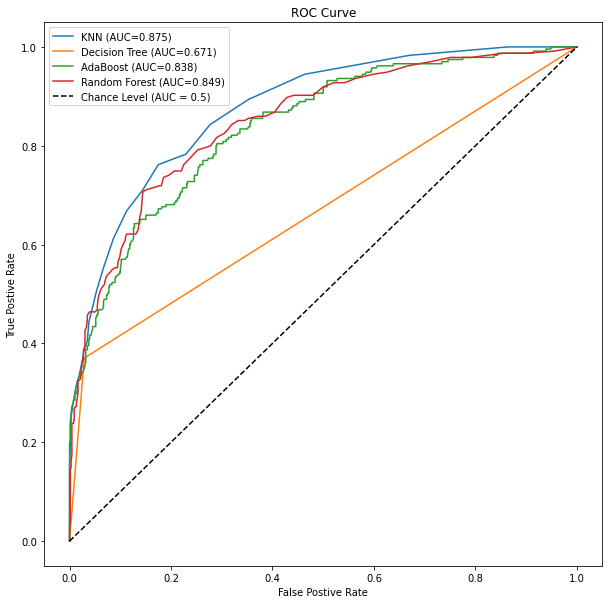

In [53]:
#ROC Graph
plt.rcParams["figure.figsize"] = (10,10)

#plt.plot(all_fpr,all_tpr, label = 'AUC = %0.2f' % auc, color = 'orange')

for i, tpr in enumerate(all_tpr):
    plt.plot(all_fpr[i],tpr, label = f"{all_models[i]} (AUC={all_auc[i]:.3})")

plt.title('ROC Curve')
plt.ylabel('True Postive Rate')
plt.xlabel('False Postive Rate')
plt.plot([0, 1], [0, 1], "k--", label="Chance Level (AUC = 0.5)")
plt.legend(loc = 'best')
plt.show()


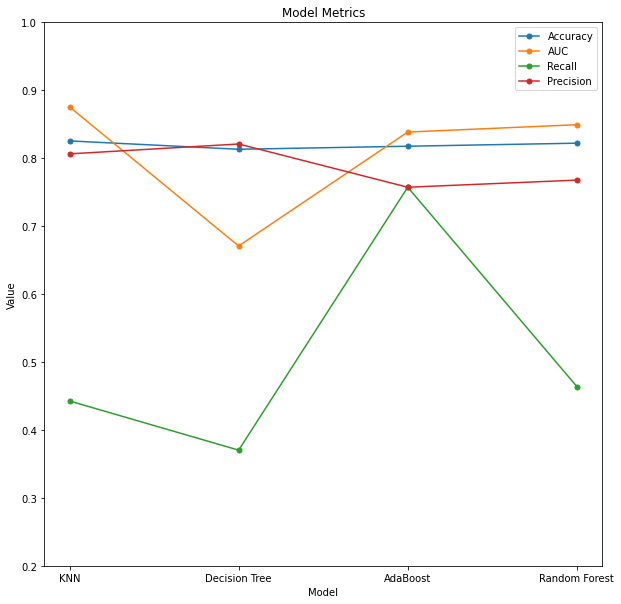

In [54]:
#ROC Graph
plt.rcParams["figure.figsize"] = (10,10)

#plt.plot(all_fpr,all_tpr, label = 'AUC = %0.2f' % auc, color = 'orange')
axes = plt.axes()
axes.set_ylim([0, 1])
axes.set_ylim([.2, 1])
plt.plot(all_models,all_scores, label = 'Accuracy', marker = '.', markersize = 10)
plt.plot(all_models,all_auc, label = 'AUC', marker = '.', markersize = 10)
plt.plot(all_models,all_recall, label = 'Recall', marker = '.', markersize = 10)
plt.plot(all_models,all_precision, label = 'Precision', marker = '.', markersize = 10)

plt.title('Model Metrics')
plt.xlabel('Model')
plt.ylabel('Value')



plt.legend()
plt.show()


This brings us to the question about what model we should use if we want to predict if it will rain tomorrow, from weather information from today. There isn't one obvious answer. If you want simplicity, you could go with the decision tree model. All one would need to measure the humidity in the afternoon, and you could make a prediction. However, that is certainly not the best solution, if you have access to more sophisticated modeling techniques. 

In that case, the choice is between KNN or AdaBoost. In overall performance, the KNN model does seem to be more accurate. But, since it has a lower recall value, it does this at the expense of having many false negatives. AdaBoost does a better job if having a more accurate recall is important. This is at the expense of a slight decrease in the precision of the model. 

## VII. Conclusion

One major thing that we can takeaway from this model is that predicting the weather from a single source is difficult. This is using weather data to predict if it will rain the next day with data from the same location. Obviously, models that use a more comprehensive set of data, would yield much better results. 

Another takeaway, is how important humidity seems to be in predicting rain in these models. It is so important, that in the decision tree model, it stopped after only on decision, even when attempting to iterate to a higher max depth.

One thing that went wrong is that none of these models work particularly well. While they have fairly high accuracy that isn’t abysmal, one has to go back to the fact that only 25 percent of the days had rain to begin with, so if you always guess that it will never rain, then you will end up with a 75 percent accuracy. I think the reason for this is weather isn't only created locally, and 24 hours in the future is a long time to predict whether it will rain, by looking at the current weather at that location. 
The model could be improved by more feature selection. While I did spend some time on feature selection, there could be more iteration in that regard to see if any features could be added or removed that would give more accurate results. 

There are many ways in which we could expand this model testing. It would be interesting to add additional cities near Sydney, and give them a variable of next day rain in Sydney. I think this would enhance the model, and probably make it more accurate.
